I encountered further memory and performance issues, so this notebook contains the answer for questions 5-8 of Exercise 4.10.

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 

Importing libraries:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Create data path:

In [2]:
# Create data path
path = r"C:\Users\Jason\Instacart Basket Analysis"

In [3]:
# Importing dataframe
df_customer_ords_merged_risk_free = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_customer_ords_merged_risk_free.pkl'))

In [4]:
# Importing active_customers df
active_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_active_customers.pkl'))

In [5]:
active_customers.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region,exclusion_flag,profile_segment
21,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
22,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
23,431534,1,5,4,15,28.0,10258,3,1,Pistachios,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
24,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
25,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
26,431534,1,5,4,15,28.0,17122,6,0,Honeycrisp Apples,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
27,431534,1,5,4,15,28.0,41787,7,0,Bartlett Pears,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
28,431534,1,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
29,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level
30,3367565,1,6,2,7,19.0,12427,2,1,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,South,False,Has dependents + Standard/Lower Income level


- For this section I chose to look at combining number of dependents and salaries and then also the age profiles who do not have dependents.
  1. Someone who has dependents and would be classified as having a higher income at over 100,000 = 'Has dependents + Higher Income level'
  2. Someone who has dependents and would be classified as a standard/lower income at under 100,000 = 'Has dependents + Standard/Lower Income level'
  3. Someone who is under 30 and has no dependents = 'Under 30 + No dependents'
  4. Someone who is over 30 and has no dependents - 'Over 30 + No dependents'

In [6]:
def profile_segment(row):
    if row['Number of Dependents'] >= 2 and row['Income'] > 100000:
        return 'Has dependents + Higher Income level'
    elif row['Number of Dependents'] >= 2:
        return 'Has dependents + Standard/Lower Income level'
    elif row['Number of Dependents'] == 0 and row['Age'] < 30:
        return 'Under 30 + No dependents'
    elif row['Number of Dependents'] == 0 and row['Age'] >=30:
        return '30 or older + No dependents'
    else:
        return 'Not defined'

In [7]:
# Using segment on active_customers
active_customers['profile_segment'] = active_customers.apply(profile_segment, axis=1)

In [8]:
# Checking the output
active_customers['profile_segment'].value_counts(dropna=False)

profile_segment
Has dependents + Standard/Lower Income level    6607012
Not defined                                     6082107
Has dependents + Higher Income level            5620756
30 or older + No dependents                     4966944
Under 30 + No dependents                        1138058
Name: count, dtype: int64

6. Create an appropriate visualization to show the distribution of profiles.

- I chose a horizontal bar chart to visualise this info. This shows a clear distribution of the customer types, I believe.

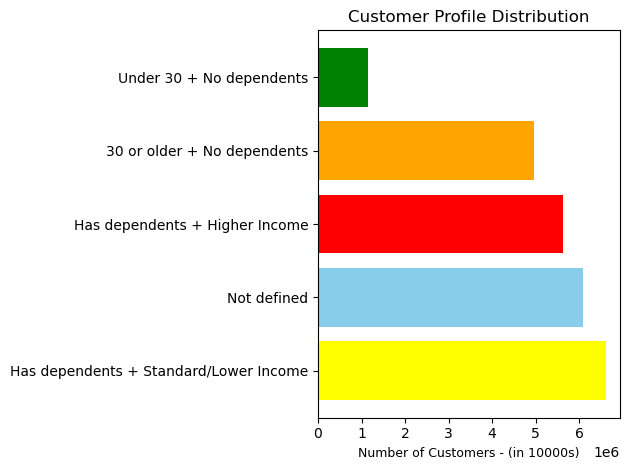

In [9]:
profiles = [
    "Has dependents + Standard/Lower Income",
    "Not defined",
    "Has dependents + Higher Income",
    "30 or older + No dependents",
    "Under 30 + No dependents"
]
values = [6607012, 6082107, 5620756, 4966944, 1138058]

# Fix: Provide colors as a list to the color parameter
plt.barh(profiles, values, color=['yellow', 'skyblue', 'red', 'orange', 'green'])
plt.xlabel("Number of Customers - (in 10000s)", fontsize=9)
plt.title("Customer Profile Distribution")
plt.tight_layout()
plt.show()

In [10]:
# Saving image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customer_profile_distribution.png'))

<Figure size 640x480 with 0 Axes>

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [11]:
# Creating a dataframe to show active customers from each region
region_segment_total_counts = active_customers.groupby(['profile_segment', 'Region']).size().reset_index(name='customer_count')

- I would like to use a stacked bar chart, so I need to pivot the data to have the region and the segment in the right places.

In [12]:
# Pivoting dataframe
pivot_active_customers = region_segment_total_counts.pivot(index='Region', columns='profile_segment', values='customer_count')

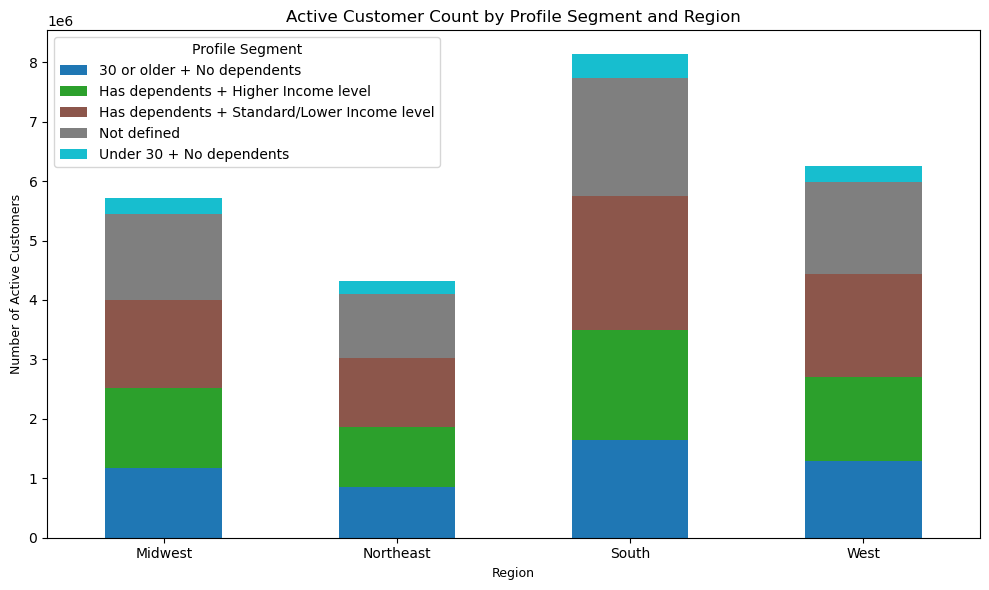

In [13]:
import matplotlib.pyplot as plt1

# Plotting the stacked bar chart
pivot_active_customers.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')

# Add labels and title
plt1.title("Active Customer Count by Profile Segment and Region", fontsize=12)
plt1.xlabel("Region", fontsize=9)
plt1.ylabel("Number of Active Customers", fontsize=9)
plt1.xticks(rotation=0)
plt1.legend(title="Profile Segment", loc='upper left')
plt1.tight_layout()
plt1.show()

In [14]:
# Saving image
plt1.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'active_customer_count.png'))

<Figure size 640x480 with 0 Axes>

8.Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

- The stacked bar chart shows that the MIDWEST has the most balanced distribution across the segments I have established.
- The SOUTH has the largest number in 'Has dependents + Standard/Lower Income level'.
- The WEST and NORTHWEST both have more prominent 'Under 30 + No dependents' and 'Undefined'
- In terms of links, the SOUTH and MIDWEST appear to have the 'traditional' household set up with dependents on decent to good salaries.
- The WEST and NORTHWEST seem to lean towards a younger or not defined profile, which could mean a different population make up in terms of age, stage of life, etc.

In [15]:
active_customers['profile_segment'].head(5)

21    Has dependents + Standard/Lower Income level
22    Has dependents + Standard/Lower Income level
23    Has dependents + Standard/Lower Income level
24    Has dependents + Standard/Lower Income level
25    Has dependents + Standard/Lower Income level
Name: profile_segment, dtype: object

In [16]:
# Exporting final dataframe
active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_active_customers.pkl'))